In [1]:
import Classification_Utils as cu
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
from matplotlib.lines import Line2D
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection
from sklearn.decomposition import TruncatedSVD

In [3]:
DPI=500 # Constant value to set resolution

# Set default font
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = "Arial"

## Load data
* One data frame for all training and test data
* One data frame for healthy vs diseased comparison
* One data frame for all training and test data, with the addition of 10 cell line datasets

In [18]:
df = pd.read_csv('../Data/Random-Data-Set/train_cna_random.csv')
print(train_test_df.shape)
labels = df['labels']
df = df.fillna(0)
binary_labels = []
for l in labels:
    if l == 'real':
        binary_labels.append(0)
    else:
        binary_labels.append(1)
#df = df.drop(columns=['labels'])
df['labels'] = binary_labels
print(binary_labels)
df.head()

(75, 17157)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,OR4F5,KLHL17,PLEKHN1,HES4,ISG15,AGRN,RNF223,C1orf159,TTLL10,TNFRSF18,...,NSMF,PNPLA7,MRPL41,DPH7,ZMYND19,ARRDC1,C9orf37,EHMT1,FAM157B,labels
0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0
1,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0
2,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0
3,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,...,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,0
4,-0.18,0.13,0.27,0.27,0.27,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.13,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,0


### Map columns to colors, and prepare PCA dataframe

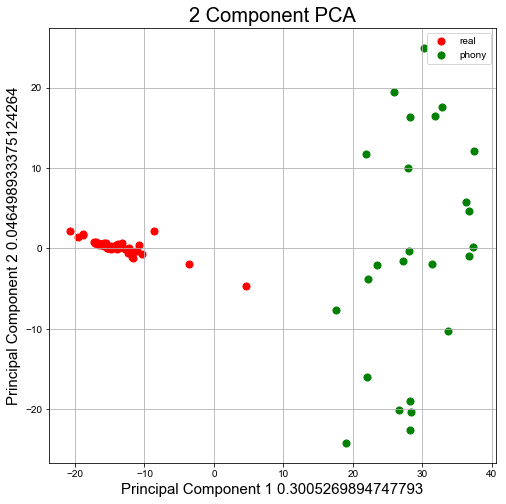

In [23]:
import seaborn as sns

#PCA graph generation

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf['label'] = labels


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 ' + str(pca.explained_variance_ratio_[0]), fontsize = 15)
ax.set_ylabel('Principal Component 2 ' + str(pca.explained_variance_ratio_[1]), fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['real', 'phony']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['label'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig('random-data-pca.png')




### tSNE (Fig2)
* Modified from https://github.com/RubensZimbres/Repo-2017/blob/master/t-SNE%20Dimensionality%20Reduction

In [ ]:
X = train_test_df.T.values.tolist()
y = train_test_labels

xx=[]
for i in range(0,len(X)):
    xx.append((X[i] - np.min(X)) / (np.max(X) - np.min(X)))
X=xx

# "It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount"
svd = TruncatedSVD(n_components=50, n_iter=100, random_state=42)
X_svd = svd.fit_transform(X)  

tsne = manifold.TSNE(random_state=0,perplexity=50,n_iter=1500)
X_tsne = tsne.fit_transform(X_svd)

In [ ]:
### Plot the data

fig = plt.figure(1, figsize=(8,5))
ax = fig.add_subplot(111)

col=0
for column in train_test_column_names:
    ax.scatter(X_tsne[col, 0], X_tsne[col, 1], color=tt_color_dict[column])
    col+=1
      
### Make Legend
new_handles = []
for tissue in train_test_tissues:
    col = train_test_tissues_to_columns[tissue][0]
    color = tt_color_dict[col]
    patch = mpatches.Patch(color=color, label=tissue.replace("_", " "))
    new_handles.append(patch)
    
lgd = ax.legend(handles=new_handles, loc=2, bbox_to_anchor=(1, 1), ncol=1)    
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

output_path = train_test_dir + 'tSNE.pdf'
fig.savefig(output_path, bbox_inches="tight", bbox_extra_artists=(lgd,), dpi=DPI)
plt.show()

## Healthy and Diseased Data

### Map each column to a corresponding label

In [ ]:
"""
Removes 'Healthy_' or 'Diseased_' prefix from column names

Args:
    col_names (list of strings): list of column names in the dataframe
    
Returns: 
    list of strings, where each string is the original column name without the healthy/diseased prefix, if there was a one
"""
def remove_prefix(col_names):
    new_names = []
    
    for name in col_names:
        if name.startswith('Diseased_'):
            new_names.append(name.replace('Diseased_', ''))
        elif name.startswith('Healthy_'):
            new_names.append(name.replace('Healthy_', ''))
        else:
            new_names.append(name)
            
    return new_names

In [ ]:
# Remove "Healthy_" or "Diseased_" prefix from column names
# Store prefixed names for later identification of each sample
original_healthy_diseased_col_names = healthy_diseased_df.columns.values.tolist()

stripped_col_names = remove_prefix(original_healthy_diseased_col_names)
healthy_diseased_df.columns = stripped_col_names

In [ ]:
healthy_diseased_tissues = ['Blood_Plasma', 'CSF', 'Liver', 'Ovary', 'Pancreas', 'Substantia_Nigra']
healthy_diseased_tissues_to_columns = cu.map_tissues_to_columns(healthy_diseased_df,
                                                                healthy_diseased_tissues)

In [ ]:
healthy_diseased_column_names = healthy_diseased_df.columns.values.tolist()
healthy_diseased_labels = cu.get_labels(healthy_diseased_column_names, 
                                        healthy_diseased_tissues_to_columns)

### Map columns to colors, and prepare PCA dataframe

In [ ]:
healthy_diseased_dir = r'D:\Images\Healthy_vs_Diseased\\'

hd_color_dict = tt_color_dict

In [ ]:
healthy_diseased_T = healthy_diseased_df.T  #Transpose data frame

healthy_diseased_pca = PCA() # create a PCA object
healthy_diseased_pca.fit(healthy_diseased_T) # do the math
healthy_diseased_pca_data = healthy_diseased_pca.transform(healthy_diseased_T) # get PCA coordinates for dataframe

healthy_diseased_per_var = np.round(healthy_diseased_pca.explained_variance_ratio_* 100, decimals = 1)
healthy_diseased_pca_labels = ['PC' + str(x) for x in range(1, len(healthy_diseased_per_var)+1)] 

### Plot Healthy vs Diseased 
Empty circles represent diseased tissues, filled circles represent healthy

In [ ]:
hd_pca_df = pd.DataFrame(healthy_diseased_pca_data, index = original_healthy_diseased_col_names, 
                         columns = healthy_diseased_pca_labels)

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.xlabel('PC1 - {0}%'.format(healthy_diseased_per_var[0]))
plt.ylabel('PC2 - {0}%'.format(healthy_diseased_per_var[1]))

for column, stripped_col in zip(original_healthy_diseased_col_names, stripped_col_names):
    fill = 'none' if column.startswith('Diseased') else hd_color_dict[stripped_col]
    ax.scatter(hd_pca_df.PC1.loc[column], 
               hd_pca_df.PC2.loc[column],
               color=hd_color_dict[stripped_col], facecolors=fill)
    
output_path = healthy_diseased_dir + 'PCA.pdf'

### Legend entries for each tissue
new_handles = []

for tissue in healthy_diseased_tissues:
    col = healthy_diseased_tissues_to_columns[tissue][0]
    color = hd_color_dict[col]
    patch = mpatches.Patch(color=color, label=tissue.replace('_', ' '))
    line = Line2D(range(1), range(1), color="white", mec=color, marker='o', markerfacecolor=color,
                  label=tissue)
    new_handles.append(patch)

### Append legend entries for open/closed circles (diseased/healthy)
blank_line = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="white")
open_circle = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="black",
                     mec='black', label='Closed Circles: Healthy')
closed_circle = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="white",
                       mec='black', label='Open Circles: Diseased')

new_handles.append(blank_line)
new_handles.append(open_circle)
new_handles.append(closed_circle)
    
### Zoom in on tightly clustered section
axins = zoomed_inset_axes(ax, 10, loc='center right') # axes, zoom-factor, location

for column, stripped_col in zip(original_healthy_diseased_col_names, stripped_col_names):
    fill = 'none' if column.startswith('Diseased') else hd_color_dict[stripped_col]
    axins.scatter(hd_pca_df.PC1.loc[column], 
                  hd_pca_df.PC2.loc[column], 
                  color=hd_color_dict[stripped_col], facecolors=fill)

x1, x2, y1, y2 = -950, -830, -30, 150 # specify the axis limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

plt.yticks(visible=False)
plt.xticks(visible=False)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
    
lgd = ax.legend(handles=new_handles, loc=2, bbox_to_anchor=(1, 1), ncol=1, prop={'size': 7})

fig.savefig(output_path, bbox_inches="tight", bbox_extra_artists=(lgd,), dpi=DPI)
plt.show()
fig.clf()

### Healthy vs Diseased tSNE (Fig3)

In [ ]:
X = healthy_diseased_df.T.values.tolist()
y = healthy_diseased_labels

xx=[]
for i in range(0,len(X)):
    xx.append((X[i] - np.min(X)) / (np.max(X) - np.min(X)))
X=xx

# "It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount"
svd = TruncatedSVD(n_components=50, n_iter=100, random_state=42)
X_svd = svd.fit_transform(X)  

tsne = manifold.TSNE(random_state=0,perplexity=50,n_iter=1500)
X_tsne = tsne.fit_transform(X_svd)

In [ ]:
### Plot the data
fig = plt.figure(1, figsize=(8,5))
ax = fig.add_subplot(111)

col=0
for column, stripped_col in zip(original_healthy_diseased_col_names, stripped_col_names):
    fill = 'none' if column.startswith('Diseased') else hd_color_dict[stripped_col]
    ax.scatter(X_tsne[col, 0], X_tsne[col, 1], edgecolors=hd_color_dict[stripped_col], facecolors=fill)
    col+=1
    
### Make Legend
new_handles = []

for tissue in healthy_diseased_tissues:
    col = healthy_diseased_tissues_to_columns[tissue][0]
    color = hd_color_dict[col]
    patch = mpatches.Patch(color=color, label=tissue.replace("_", " "))
    line = Line2D(range(1), range(1), color="white", mec=color, marker='o', markerfacecolor=color,
                  label=tissue)
    new_handles.append(patch)

### Append legend entries for open/closed circles (diseased/healthy)
blank_line = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="white")
open_circle = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="black",
                     mec='black', label='Closed Circles: Healthy')
closed_circle = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="white",
                       mec='black', label='Open Circles: Diseased')

new_handles.append(blank_line)
new_handles.append(open_circle)
new_handles.append(closed_circle)
    
lgd = ax.legend(handles=new_handles, loc=2, bbox_to_anchor=(1, 1), ncol=1)    
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

output_path = healthy_diseased_dir + 'Healthy_Diseased_tSNE.pdf'
fig.savefig(output_path, bbox_inches="tight", bbox_extra_artists=(lgd,), dpi=DPI)

plt.show()

## Cell Line Data 

### Map each column to a corresponding label

In [ ]:
tt_cell_line_tissues = ['Blood_Plasma', 'Blood_Serum', 'CSF', 'Liver', 'Monocyte', 'Ovary', 'Pancreas', 'Substantia_Nigra', 'Temporal_Lobe', 'Cell_Line']

tt_cell_line_tissues_to_columns = cu.map_tissues_to_columns(tt_cell_line_df, tt_cell_line_tissues)

In [ ]:
tt_cell_line_column_names = tt_cell_line_df.columns.values.tolist()
tt_cell_line_labels = cu.get_labels(tt_cell_line_column_names, tt_cell_line_tissues_to_columns)

### Map columns to colors, and prepare PCA data frames

In [ ]:
cell_line_dir = r'D:\Images\Cell_Line\\'

cell_line_cols = [col for col in tt_cell_line_df if col.startswith('Cell_Line')]

tt_cell_line_color_dict = {}
for col in cell_line_cols:
    tt_cell_line_color_dict[col] = 'gray'
    
tt_cell_line_color_dict.update(tt_color_dict)

In [ ]:
tt_cell_line_T = tt_cell_line_df.T  #Transpose data frame

tt_cell_line_pca = PCA() # create a PCA object
tt_cell_line_pca.fit(tt_cell_line_T) # do the math
tt_cell_line_pca_data = tt_cell_line_pca.transform(tt_cell_line_T) # get PCA coordinates for dataframe

tt_cell_line_per_var = np.round(tt_cell_line_pca.explained_variance_ratio_* 100, decimals = 1)
tt_cell_line_pca_labels = ['PC' + str(x) for x in range(1, len(tt_cell_line_per_var)+1)] 

### PCA of all train and test tissues with liver cell line samples

In [ ]:
def draw_2d_pca(column_names, pca_data, base_dir, 
                color_dict, per_var, labels, 
                tissues, tissues_to_columns):
    
    pca_df = pd.DataFrame(pca_data, index = column_names, columns = labels)

    fig = plt.figure(1)
    ax = fig.add_subplot(111)

    plt.xlabel('PC1 - {0}%'.format(per_var[0]))
    plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
    for column in column_names:
        ax.scatter(pca_df.PC1.loc[column], pca_df.PC2.loc[column], color=color_dict[column])
        
    new_handles = []
    for tissue in tissues:
        col = tissues_to_columns[tissue][0]
        color = color_dict[col]
        patch = mpatches.Patch(color=color, label=tissue.replace("_", " "))
        new_handles.append(patch)
    
    output_path = base_dir + 'PCA.pdf'
    lgd = ax.legend(handles=new_handles, loc=2, bbox_to_anchor=(1, 1), ncol=1)
    fig.savefig(output_path, bbox_inches="tight", bbox_extra_artists=(lgd,), dpi=DPI)
    fig.clf()

In [ ]:
draw_2d_pca(tt_cell_line_column_names, tt_cell_line_pca_data, cell_line_dir, 
            tt_cell_line_color_dict, tt_cell_line_per_var, tt_cell_line_pca_labels, 
            tt_cell_line_tissues, tt_cell_line_tissues_to_columns)

## tSNE of train and test tissues with liver cell line (Fig7)

In [ ]:
cell_line_X = tt_cell_line_df.T.values.tolist()
cell_line_y = tt_cell_line_labels

cell_line_xx = []
for i in range(0,len(cell_line_X)):
    cell_line_xx.append((cell_line_X[i] - np.min(cell_line_X)) / (np.max(cell_line_X) - np.min(cell_line_X)))
cell_line_X = cell_line_xx

svd = TruncatedSVD(n_components=50, n_iter=100, random_state=42)
cell_line_X_svd = svd.fit_transform(cell_line_X)  

tsne = manifold.TSNE(random_state=0,perplexity=50,n_iter=1500)
cell_line_X_tsne = tsne.fit_transform(cell_line_X_svd)

In [ ]:
### Plot the data
fig = plt.figure(1, figsize=(8,5))
ax = fig.add_subplot(111)

col=0
for column in tt_cell_line_column_names:
    ax.scatter(cell_line_X_tsne[col, 0], cell_line_X_tsne[col, 1], color=tt_cell_line_color_dict[column])
    col+=1
      
### Make Legend
new_handles = []
for tissue in tt_cell_line_tissues:
    col = tt_cell_line_tissues_to_columns[tissue][0]
    color = tt_cell_line_color_dict[col]
    patch = mpatches.Patch(color=color, label=tissue.replace("_", " "))
    new_handles.append(patch)
    
lgd = ax.legend(handles=new_handles, loc=2, bbox_to_anchor=(1, 1), ncol=1)    
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

plt.show()

output_path = cell_line_dir + 'tSNE_with_cell_line.pdf'
fig.savefig(output_path, bbox_inches="tight", bbox_extra_artists=(lgd,), dpi=DPI)